In [3]:
import matplotlib.pyplot as plt

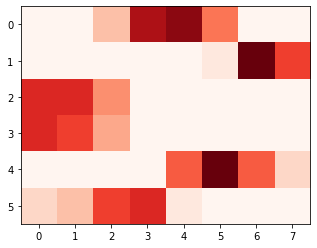

In [9]:

cluster_age = [
    [0, 0, 3, 11, 12, 6, 0, 0],
    [0, 0, 0, 0, 0, 1, 13, 8],
    [9, 9, 5, 0, 0, 0, 0, 0],
    [9, 8, 4, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 7, 13, 7, 2],
    [2, 3, 8, 9, 1, 0, 0, 0],
]

plt.imshow(cluster_age, cmap="Reds")

In [35]:

from typing import cast, Type
from decimal import Decimal


class Si:
    unit_num = []
    unit_den = []

    def __init__(self, i, e=0):
        self.i = Decimal(i)
        self._e = e

    @property
    def unit(self):
        unit = "".join(self.unit_num)
        unit += "/"
        unit += "".join(self.unit_den)
        return unit

    @property
    def e(self):
        return self._e

    @e.setter
    def e(self, e):
        self.i *= Decimal(10)**(self.e - e)
        self._e = e

    @property
    def prefix(self):
        return {
            -6: "m",
            -3: "m",
            -2: "c",
            -1: "d",
            0: "",
            3: "k",
            6: "M",
            9: "G",
            12: "T",
        }.get(self.e, f"e{self.e}")

    def __repr__(self):
        return f"{self.i}{self.prefix}{self.unit}"

    def __add__(self, other):
        cls = type(self)
        if not isinstance(other, Si):
            other = cls(other, self.e)
        if self.unit != other.unit:
            raise ArithmeticError("units differ")
        other.e = self.e
        return cls(self.i + other.i, self.e)

    def __sub__(self, other):
        cls = type(self)
        if not isinstance(other, Si):
            other = cls(other, self.e)
        if self.unit != other.unit:
            raise ArithmeticError("units differ")
        other.e = self.e
        return cls(self.i + other.i, self.e)

    def __div__(self, other):
        cls = type(self)
        if not isinstance(other, Si):
            other = cls(other, self.e)
        if self.unit != other.unit:
            other.e = 0
            cls_name = f"{cls.__name__}Per{type(other).__class__}"
            new_cls = cast(Type[Si], type(cls_name, Si))  # type: Type[Si]
            new_cls.unit_num = self.unit_num + other.unit_den
            new_cls.unit_den = self.unit_den + other.unit_num
            return new_cls(self.i / other.i, self.e)
        other.e = self.e
        return cls(self.i + other.i, self.e)

    def __mul__(self, other):
        cls = type(self)
        if not isinstance(other, Si):
            other = cls(other, self.e)
        if self.unit != other.unit:
            other.e = 0
            cls_name = f"{cls.__name__}Per{type(other).__class__}"
            new_cls = cast(Type[Si], type(cls_name, Si))  # type: Type[Si]
            new_cls.unit_num = self.unit_num + other.unit_den
            new_cls.unit_den = self.unit_den + other.unit_num
            return new_cls(self.i / other.i, self.e)
        other.e = self.e
        return cls(self.i + other.i, self.e)


In [41]:
class Meter(Si):
    unit = 'm'


km = Meter(1000)
km.e = 3
km + km

2.000km

In [ ]:
def free_fall(t, G=9.80665):
    return (-G * t ** 2) / 2

